### Assignment 5 Astr 221

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches

In [3]:
data = pd.read_fwf('yaletrigplx.txt')
data.columns = ["ID", "app_v_magnitude", "color", "parallax", "uncertainty"]

In [4]:
#change from apparent magnitude to absolute magnitude
app_magnitude = data['app_v_magnitude']

abs_magnitude = app_magnitude - 5*(np.log10(1/data['parallax'])) + 5

data['abs_v_magnitude'] = abs_magnitude

In [5]:
data.head()

,ID,app_v_magnitude,color,parallax,uncertainty,abs_v_magnitude
0,3.0,8.45,1.05,0.0717,113,7.727596
1,4.0,9.01,1.44,0.0886,23,8.747169
2,6.0,8.60,0.94,0.0147,55,4.436587
3,7.0,5.96,0.67,0.0455,50,4.250057
4,7.0,6.43,0.64,0.0455,50,4.720057


In [6]:
result = data.loc[data['color'] >= 2.5]
print(result)

        ID  app_v_magnitude  color  parallax  uncertainty  abs_v_magnitude
1647  73.0            10.16   4.25    0.0024          169         2.061056
1705  33.0             5.29   2.61    0.0050          124        -1.215150
2308  31.1             6.64   3.36    0.0032          198        -0.834250
3199  36.0             4.99   2.54    0.0009          128        -5.238787


Text(0.75, 6, 'Sun')

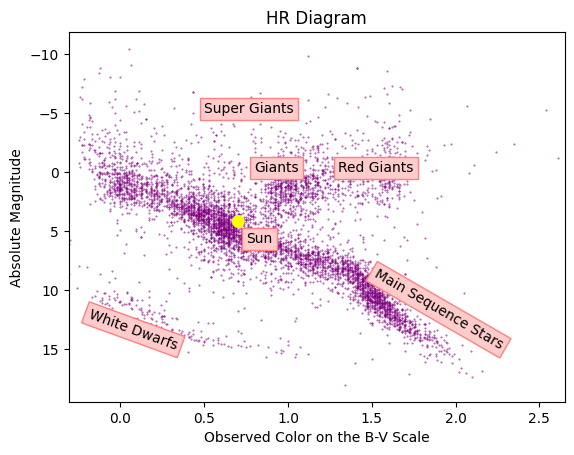

In [16]:
#HR diagram of color versis absolute magnitude, annotated with classifications and the Sun

plt.scatter(data['color'], data['abs_v_magnitude'],s=0.2, color = "purple", alpha = .7)
plt.gca().invert_yaxis()

plt.xlim(-.31, 2.65)

plt.xlabel("Observed Color on the B-V Scale")
plt.ylabel("Absolute Magnitude")
plt.title("HR Diagram")

plt.text(1.5, 15, "Main Sequence Stars", color = "black", rotation=-30,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

plt.text(0.5, -5, "Super Giants", color = "black", rotation=-0,
            bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

plt.text(1.3, 0, "Red Giants", color = "black", rotation=-0,
            bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

plt.text(0.8, 0, "Giants", color = "black", rotation=-0,
            bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

plt.text(-.2, 15, "White Dwarfs", color = "black", rotation=-20,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

plt.text(.656, 4.53, "●", color = "yellow", size = "large")
plt.text(.75, 6, "Sun", color = "black",
            bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )


Text(0.5, 1.0, 'HR Diagram with Parallax Uncertainties < 100 millarcsecs')

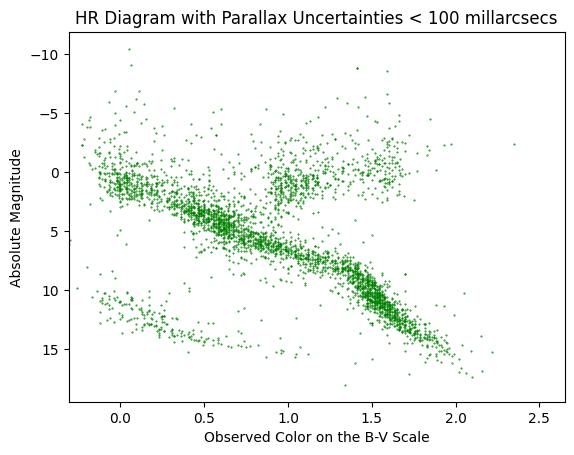

In [8]:
less_than_hundred = data.loc[data['uncertainty'] <= 100]
plt.scatter(less_than_hundred['color'], less_than_hundred['abs_v_magnitude'],s=0.2, color = "green")

plt.gca().invert_yaxis()

plt.xlim(-.31, 2.65)

plt.xlabel("Observed Color on the B-V Scale")
plt.ylabel("Absolute Magnitude")
plt.title("HR Diagram with Parallax Uncertainties < 100 millarcsecs")

Text(0.5, 1.0, 'HR Diagram with Parallax Uncertainties < 50 millarcsecs')

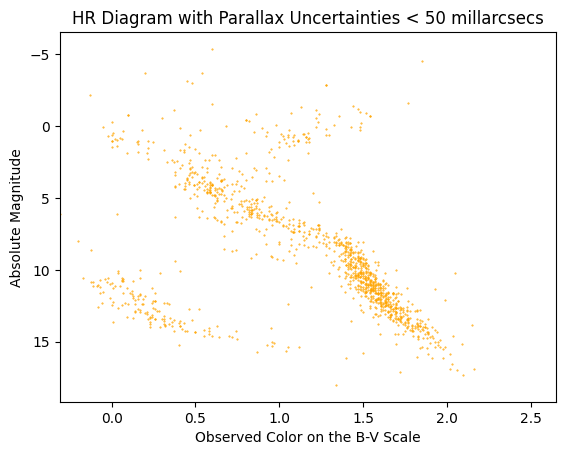

In [9]:
less_than_fifty = data.loc[data['uncertainty'] <= 50]
plt.scatter(less_than_fifty['color'], less_than_fifty['abs_v_magnitude'],s=0.2, color = "orange")

plt.gca().invert_yaxis()

plt.xlim(-.31, 2.65)

plt.xlabel("Observed Color on the B-V Scale")
plt.ylabel("Absolute Magnitude")
plt.title("HR Diagram with Parallax Uncertainties < 50 millarcsecs")

Text(0.5, 1.0, 'HR Diagram with Parallax Uncertainties > 100 millarcsecs')

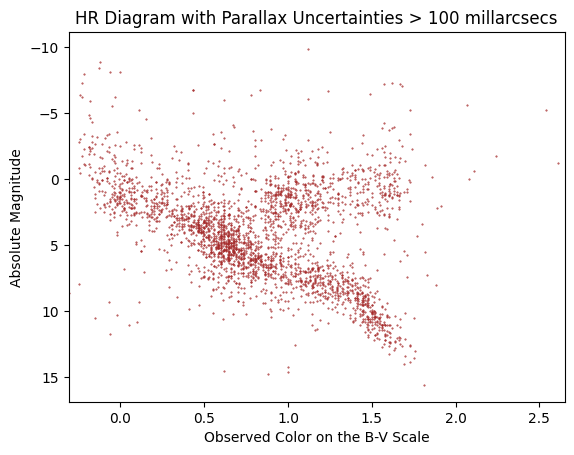

In [10]:
greater_than_hundred = data.loc[data['uncertainty'] >= 100]
plt.scatter(greater_than_hundred['color'], greater_than_hundred['abs_v_magnitude'],s=0.2, color = "brown")

plt.gca().invert_yaxis()

plt.xlim(-.31, 2.65)

plt.xlabel("Observed Color on the B-V Scale")
plt.ylabel("Absolute Magnitude")
plt.title("HR Diagram with Parallax Uncertainties > 100 millarcsecs")

##### Why do you think the different parallax error limits lead to the differences you see in the four H-R diagrams you’ve made? (HINT: think about possible observational biases!)
- For the full dataset HR diagram, there is a lot of scatter from all of the stars that have a higher error, which is explained further on.
- For the parallax error of <100 ms, limiting the parallax reduces errors in the absolute magnitude calculations. This allows for a  more precise diagram, however, it will also mostly show the stars that are closer and/or brighter to us since they can be measured much more accurately.
- For the parallax error of <50ms, the diagram of stars is even more focused and reduces the errors in absolute magnitude even more. The diagram will pretty much only show nearby stars since the error is large with farther away stars, even if they are bright, which means this is a good way of looking for nearby stars.
- For the parallax errors of >100ms, the stars that will be seen are more likely to be stars that are dimmer and further away. Since the errors are on absolute magnitude, this will cause a lot of scatter in the diagram as compared to the previous two diagrams.